In [209]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go



<b> Simple Plotly Examples! <b>

Below we are going to be creating a variety of plots to showcase plotly's uses. We will the tornado data set to show the interactivity of these plots.

In [210]:
tornadoData = pd.read_csv('us_tornado_dataset_1950_2021.csv')
tornadoData.head()

# isolating the number of tornados at each magnitude for each state
magStCount = tornadoData.groupby(['st','mag']).size()
magStCount = magStCount.to_frame(name = 'size').reset_index()
magStCount


,st,mag,size
0,AK,0,4
1,AL,-9,5
2,AL,0,793
3,AL,1,922
4,AL,2,459
...,...,...,...
272,WY,0,432
273,WY,1,190
274,WY,2,59
275,WY,3,13


<b>Histogram<b>

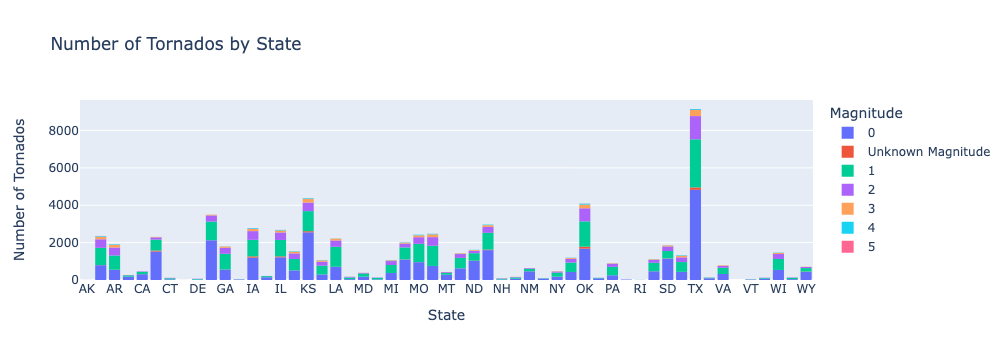

In [211]:

fig2 = px.histogram(magStCount, x='st', y='size', labels = {'mag':'Magnitude','st':'State', 'size':'Tornado Count'}, 
                    color='mag',
                    title="Number of Tornados by State")

fig2.update_layout(yaxis_title="Number of Tornados")

# The value of -9 is used for tornados of unknown magnitude so lets change that to say unknown magnitude in the plot without
# changing the data
newnames = {'-9':'Unknown Magnitude', '0': '0', '1': '1', '2': '2', '3': '3', '4': '4','5': '5'}
fig2.for_each_trace(lambda t: t.update(name = newnames[t.name],
                                      legendgroup = newnames[t.name],
                                      hovertemplate = t.hovertemplate.replace(t.name, newnames[t.name])
                                     ))
fig2.show()

Above you can see a histogram with the states and the number of tornados recorded for each one. The histogram is colored by the magnitude of each tornado. If you click and drag up or down you can isolate different parts of the graph to get more information. Likewise you can double click on the values in the legend to isolate specific values and if you double click on the graph it will reset your zooms. If you hover over each bar you will see a trace that gives you more information. 

<b>Line Plot<b>

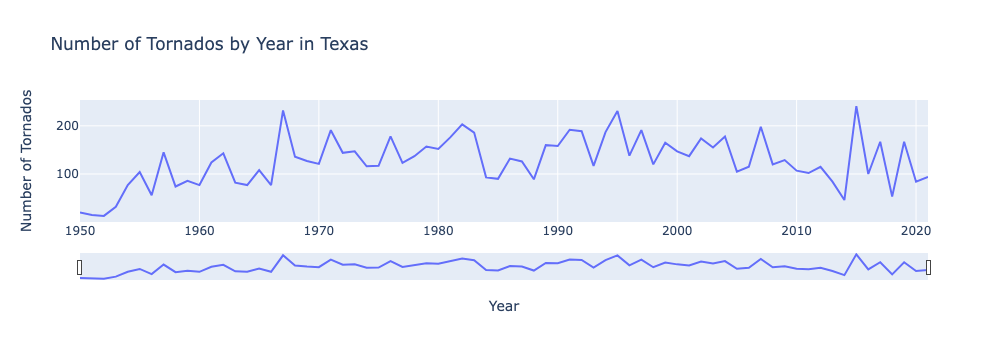

In [212]:

yrStCount = tornadoData.groupby(['st','yr']).size()
yrStCount = yrStCount.to_frame(name = 'size').reset_index()
yrStCount

texasTornados = yrStCount[yrStCount['st']=='TX']
texasTornados

fig3 = px.line(texasTornados, x='yr', y='size',
               labels={'yr':'Year', 'size':'Number of Tornados'}, 
               title='Number of Tornados by Year in Texas')

fig3.update_xaxes(rangeslider_visible=True)

fig3.show()

The above plot shows the number of tornados per year in Texas. By adding the range slider to the x axes we can add a slider at the bottom of the graph that lets us easily look at a subset of the data. Again, wer can double click the graph to reset the interaction.

<b>Scatter Plot<b>

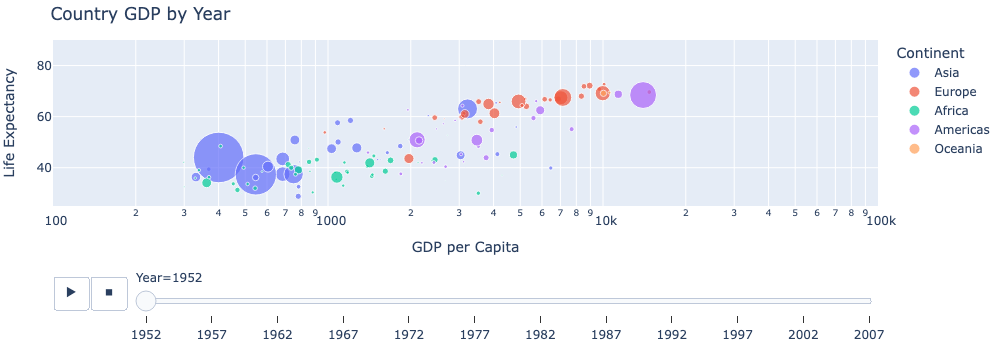

In [213]:

df = px.data.gapminder()
fig4 = px.scatter(df, x="gdpPercap", y="lifeExp", 
                  animation_frame="year", animation_group="country",
                  labels={'continent':'Continent',
                          'gdpPercap':'GDP per Capita',
                          'lifeExp':'Life Expectancy','year':'Year',
                          'pop':'Population'},
                  title='Country GDP by Year',
                  size="pop", color="continent", hover_name="country",
                  log_x=True, size_max=55, range_x=[100,100000], range_y=[25,90])

fig4.update_layout(margin=dict(l=20, r=20, t=40, b=20))

#fig4["layout"].pop("updatemenus") # optional, gets rid of animation buttons

fig4.show()

Similar to one of the first plots we saw in class, the above plot shows each country's GDP per year and the life expectancy tied to that. The size of the bubble is based on the population of the country for that year and the colors represent the continent in which they are located. This is a lot of information and one would expect this to take many lines of code to write however it is only the 3 lines above! The plot also has all of the same interactive features of the previous plots. If you jus wanted the slider you can uncomment the 'fig4["layout"]...' line and it will remove the play/stop buttons from your plot. 

<b>Heatmap<b>

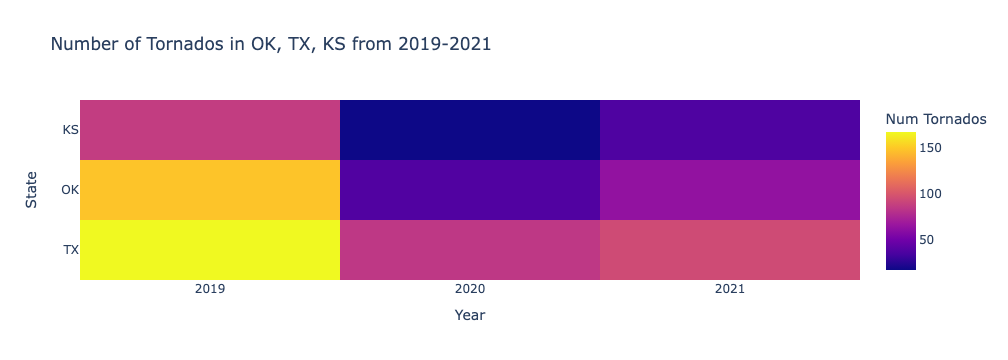

In [214]:

#below subsets the data to have only TX OK and KS num of tornados from 2019-2021
oktxks = tornadoData[tornadoData['st'].isin(['TX','KS','OK'])]
oktxks = oktxks[oktxks['yr'].isin([2019,2020,2021])]
oktxks = oktxks.groupby(['st','yr']).size()
oktxks = oktxks.to_frame(name = 'size').reset_index()

# below pivots the df to have size as our values
oktxksPiv = oktxks.reset_index().groupby(['st', 'yr'])['size'].aggregate('first').unstack()


fig5 = px.imshow(oktxksPiv, labels=dict(x="Year", y="State", color="Num Tornados"),
                 x=['2019', '2020', '2021'], 
                 title='Number of Tornados in OK, TX, KS from 2019-2021', aspect='auto')

fig5.show()

The above code creates the heatmap above containing the number of tornados for KS, OK, and TX from 2019-2021. If you hover over each cell you can see the meta data for that cell. Additionally you can zoom in and out.

<b>Links to more information!<b>

Getting Started:             https://plotly.com/python/getting-started/ <br>
Histograms:                  https://plotly.com/python/histograms/ <br>
Line Plots:                  https://plotly.com/python/line-charts/ <br>
Scatter Plots:               https://plotly.com/python/line-and-scatter/ <br>
Heatmaps:                    https://plotly.com/python/heatmaps/v <br>
Time Series:                 https://plotly.com/python/time-series/ <br>
Plotly Python Documentation: https://plotly.com/python-api-reference/index.html <br>